# Capítulo 7 - Correspondência de Padrões com Expressões Regulares

Talvez você já esteja acostumadoa a pesquisar um texto pressionando **CTRL+F** e digitando as palavras que estiver procurando. As *expressões regulares* vão um passo além: elas permitem especificar o *padrão* de texto a ser procurado. Talvez você não saiba exatamente o número de telefone comercial, contudo, se você morar nos Estados Unidos ou Canadá, saberá que ele possui três dígitos seguidos de um hífen e depois mais quatro dígitos (e, de modo opcional, um código de área de três dígitos no início). É dessa forma que você como ser humano reconhece um número de telefone com o vê: 415-555-1234 é um número de telefone, porém 4.155.551.234 não é.

As expressões regulares são úteis, mas muitos dos qe não são programadores as desconhecem, apesar de os editores e processadores de texto mais modernos (como o *Microsoft Word* e *OpenOffice*) possuirem recursos de pesquisa e de pesquisa e substituição que possam realizar buscas baseadas em expressões regulares. As expressões reglares permitem economizar muito tempo não só para os usuários de software, mas também para os programadores. Com efeito, o autor de obras técnicas Cory Doctorow argumenta que, mesmo antes de ensinar programação, devíamos ensinar expressões regulares:

- _"Conhecer [as expressões regulares] pode significar a diferença entre resolver um probema em três oassis e resolvê-lo em 3 mil passos. Quando se é um nerd, você esquece que os problemas que resolvemos com o pressionamento de algumas teclas pode exigir dias de trabalho lento, maçante e suscetível a erros de outras pessoas."_

Neste capítulo, começaremos criando um programa para encontrar padrões de texto *sem* usar expressões regulares e então veremos como usá-las para deixar o código muito mais compacto.  Veremos como fazer correspondências básicas usando expressões regulares e, em seguida, prosseguiremos com alguns recursos mais eficazes como substituição de strings e criação de suas próprias classes de caracteres. Por fim, no final do capítulo, criaremos um programa que poderá extrair automaticamente números de telefone e endereços de email de um bloco de texto.

## Encontrando padrões de texto sem usar expressões regulares

Suponha que você queira encontrar um número de telefone em uma string. Vocâ já sabe como é o padrão: três números, um hífen, três números, um hífen e quatro números. Aqui está um exemplo: 415-555-4242.

Vamos usar uma função chamada **numero_telefone()** para verificar se uma string corresponde a esse padrão, retornando *True* ou *False*. Crie um novao arquivo para que possamos escrever o código. O nome do arquivo é **num_tel.py**.

A função **numero_telefone()** contém um código que realiza diversas verificações para saber se a string em *texto* é um número de telefone válido. Se algumas dessas verificações falhar, a função retornará *False*. Inicialmente, o código verifica se a string possui exatamente 12 caracteres, na Linha 2:

In [ ]:
2. if len(texto) != 12:
3.     return False

Em seguida, verifica se o código de área, ou seja, os três primeiros dígitos de *texto* é constituído somente de números, na Linha 6:

In [ ]:
5. for i in range(0, 3):
6.     if not texto[i].isdecimal():
7.         return False

O restante da função verifica se a string está de acordo com o padrão de um número de telefone: o número deve ter primeiro um hífen após o códio de área, como visto na Linha 9:

In [ ]:
9. if texto[3] != '-':
10.    return False

Deve ter mais de três caracteres numéricos, na Linha 13:

In [ ]:
12. for i in range(4, 7):
13.     if not texto[i].isdecimal():
14.         return False

Depois outro hífen, como visto na Linha 16:

In [ ]:
16. if texto[7] != '-':
17.     return False

E, por fim, mais quatro números, na Linha 20:

In [ ]:
19. for i in range(8, 12):
20.     if not texto[i].isdecimal():
21.         return False

Se a execução do programa conseguir passar por todas as verificações, *True* será retornado,  como visto na Linha 23:

In [ ]:
23. return True

Chamar **numero_telefone()** com o argumento '415-555-4242' retornará *True*. Chamar **numero_telefone()** com 'Olá olá' retornará *False*; o primeiro teste falha, pois 'Olá olá' não tem um tamanho igual a 12 caracteres.

Será necessário adicionar mais código ainda para encontrar esse padrão de texto em uma string maior.

A cada iteração do loop **for**, uma nova porção de 12 caracteres de *mensagem* é atribuída à variável *pedaco*, na Linha 34:

In [ ]:
32. mensagem = 'Me ligue no 415-555-1011 amanhã. 415-555-9999 é meu escritório.'
33. for i in range(len(mensagem)):
34.     pedaco = mensagem[i:i+12]

Por exemplo, na primeira iteração, *i* será 0 e *pedaco* receberá *mensagem[0:12]* (ou seja, 'Me ligue no '). Na próxima iteração, *i* será 1 e *pedaco* receberá *mensagem[1:13]* (a string 'e ligue no 4').

Passamos *pedaco* para **numero_telefone()** para verificar se ela corresponde ao padrão de número de telefone e, em caso de afirmativo, essa porção da string é exibida, como visto na Linha 35:

In [ ]:
35. if numero_telefone(pedaco):
36.     print(f'Número de telefone encontrado: {pedaco}')

Continue a percorrer *mensagem* em um loop e, em algum momento, os 12 caracteres de *pedaco* corresponderão a um número de telefone. O loop percorrerá toda a string, testando cada porção de 12 caracteres e eibindo qualquer *pedaco* que satisfaça **numero_telefone()**. Após termos acabado de percorrer *mensagem*, exibimos 'Fim', na Linha 37:

In [ ]:
37. print('Fim')

Embora a string de *mensagem* seja curta nesse exemplo, ela poderia ter milhões de caracteres de tamanho e o programa continuaria executando em menos de um segundo. Um programa semelhante que encontra números de telefone usando expressões regulares também seria executado em menos de um segundo, porém as expressões regulares agilizam a escrita desses programas.

## Encontrando padrões de texto com expressões regulares

O programa anterior para encontrar números de telefone funciona, porém utiliza bastante código para fazer algo limitado: a função **numero_telefone()** contém 23 linhas, porém é capaz de identificar somente um padrão de número de telefone. O que aconteceria se o número de telefone estivesse formatado como 415.555.4242 o como (415) 555-4242? E se o número de telefone tivesse uma extensão, por exemplo, 415-555-4242 x99? A função **numero_telefone()** falharia ao validar esses número. Poderíamos acrescentar mais código para esses padrões adicionais, porém há uma maneira mais simples de resolver esse problema.

As espressões regulares (*regular expressions*), chamadas de *regexes* por questões de concisão, correspondem a descrições para um padrão de texto. Por exemplo, um **\d** é uma regex que representa um dígito, ou seja, qualquer numeral único entre 0 e 9. A regex **\d\d\d-\d\d\d-\d\d\d\d** é usada pelo Python para fazer a correspondência do mesmo texto conforme feito pela função **numero_telefone()**: uma string com três números, um hífen, mais três números, um hífen e quatro números. Qualquer outra string não corresponderá à regex **\d\d\d-\d\d\d-\d\d\d\d**.

No entanto as expressões regulares podem ser muito mais sofisticadas. Por exemplo, acrescentar em 3 entre chaves ({3}) após um padrão é como dizer 'faça a correspondência desse padrão três vezes'. Desse modo, a regex **\d{3}-\d{3}-\d{4}**, um pouco mais concisa, também corresponde ao formato correto de número de telefone.

### Criando objetos Regex

Todas as funções de regex em Python estão no módulo **re**. Basta digitar no começo de cada código o seguinte:

In [ ]:
import re

Passar um valor de string que represente sua expressão regular a **re.compile()** fará um objeto **Regex** de padrão ser retornado (ou, simplesmente, um objeto **Regex**).

Para criar um objeto **Regex** que corresponda ao padrão de número de telefone, use o seguinte código (lembre-se de que **\d** quer dizer 'um caractere correspondete a um dígito' e **\d\d\d-\d\d\d-\d\d\d\d** é a expressão regular para o padrão de número de telefone):

In [ ]:
num_telefone_regex = re.compile(r'\d\d\d-\d\d\d-\d\d\d\d')

Agora a variável *num_telefone_regex* contém um objeto **Regex**.

### Passando strings puras para re.compile()

Lembre-se de que os caracteres de escape e Python usam a barra invertida (\). O valor de string `'\n` representa um único caractere de quebra de linha, e não uma barra invertida seguida de um *n* minúsculo. É preciso fornecer o caractere de escape (\\) para exibir uma única barra invertida. Portanto `'\\n'` é uma string que representa uma barra invertida seguida de um *n* minúsculo. Entretanto, ao colocar um *r* antes do primeiro caractere de aspas do valor da string, podemos marcar a string como **pura** (raw string), que não considera caracteres de escape.

Como as expressões regulares geralmente utilizam barras invertidas, é conveniente passar string puras para a função **re.compile()** em vez de digitar barras invertidas extras. Digitar **r'\d\d\d-\d\d\d-\d\d\d\d'** é muito mais fácil que digitar **\\d\\d\\d-\\d\\d\\d-\\d\\d\\d\\d**.

### Objetos Regex de correspondência

O método **search()** de um objeto **Regex** pesquisa a string recebida em busca de qualquer correspondência com a regex. O método **search()** retornará *None* se o padrão regex não for encontrado na string. Se o padrão for encontrado, o método **search()** retornará um objeto **Match**. Os objeto **Match** têm um método **group()** que retornará o texto correspondente extraído da string pesquisada (veremos os grupos em breve). Por exemplo, digite o seguinte código:

In [ ]:
num_telefone_regex = re.compile(r'\d\d\d-\d\d\d-\d\d\d\d')
mo = num_telefone_regex.search('Meu número é 415-555-4242.')
print(f'Número de telefone encontrado: {mo.group()}')

Será retornado:

- Número de telefone encontrado: 415-555-4242

O nome da variável *mo* é somente um nome genérico usado em objeto **Match**. Esse exemplo pode parecer complicado à primeira vista, porém é muito mais conciso que o programa **num_tel.py** anterior e faz o mesmo.

Nesse caso, passamos o padrão desejadp a **re.compile()** e armazenamos o objeto **Regex** resultante em *num_telefone_regex*. Em seguida, chamamos o método **search()** em *num_telefone_regex* e lhe passamos a string que queremos encontrar uma correspondência. O resultado da pesquisa será armazenado na variável *mo*. Nesse exemplo, sabemos que nosso padrão será encontrado na string, portanto sabemos que um objeto **Match** será retornado. Sabendo que *mo* contém um objeto **Match** e não o valor nulo *None*, podemos chamar o método **group()** em *mo* para retornar a correspondência. Escrever **mo.group()** em nossa função **print()** exibirá a a correspondência completa, ou seja, 415-555-4242.

### Revisão da correspondência com expressão regular

Embora haja diversos passos para usar expressões regulares em Python, cada passo é bem simples:

1. Importe o módulo regex usando **import re**.


2. Crie um objeto **Regex** usando a função **re.compile()** (lembre-se de usar a string pura).


3. Passe a string que você quer pesquisar ao método **search()** do objeto **Regex**. Isso fará um objeto **Match** ser retornado.


4. Chame o método **group()** do objeto **Match** para retornar uma string com o texto correspondente.

## Mais correspondeência de padrões com expressões regulares

Agora que os passos básicos para criar e encontrar objetos correspondentes a expressões regulares em Python já são conhecidos, você já está pronto para experimentar alguns dos recursos mais eficazes da correspondência de padrões.

### Agrupando com parênteses

Suponha que você queira separar o código de área do restante do número de telefone. A adição de parênteses criará *grupos* regex: **(\d\d\d)-(\d\d\d-\d\d\d\d)**. Então você poderá usar o método **group()** do objeto de correspondência para obter o texro correspondente de apenas um grupo.

O primeiro conjunto de parênteses em uma string de regex será o grupo 1. O segundo conjunto será o grupo 2. Ao passar o inteiro 1 ou 2 ao método **group()** do objeto de correspondência, podemos obter partes diferentes do texto correspondente. Ao passar 0 ou nada ao método **group()**, o texto correspondente completo será retornado. Digite o seguinte código:

In [ ]:
num_telefone_regex = re.compile(r'(\d\d\d)-(\d\d\d-\d\d\d\d)')
mo = num_telefone_regex.search('Meu número é 415-555-4242.')
mo.group(1)
# '415'
mo.group(2)
# '555-4242'
mo.group(0)
# '415-555-4242'
mo.group()
# '415-555-4242'

Se quiser obter todos os grupos de uma só vez, utilize o método **groups()**, observe a forma plural no nome. Digite o seguinte código:

In [ ]:
mo.groups()
# ('415', '555-4242')
codigo_area, numero_principal = mo.groups()
print(codigo_area)
# 415
print(numero_principal)
# 555-4242

Como **mo.groups()** retorna uma tupla com diversos valores, podemos usar o truque da atribuição múltipla para atribuir cada valor a uma variável diferente, como na linha `codigo_area, numero_principal = mo.groups()` anterior.

Os parênteses têm um significado especial em expressões regulares, porém os que devemos fazer se for necessário corresponder a parênteses em seu texto? Por exemplo, talvez os números de telefone aos quais você esteja tentando corresponder tenham o código de área definido entre parênteses. Nesse caso, será necessário escapar os caracteres **(** e **)** com uma barra invertida. Digite o seguinte código:

In [ ]:
num_telefone_regex = re.compile(r'(\(\d\d\d\)) (\d\d\d-\d\d\d\d)')
mo = num_telefone_regex.search('Meu número é (415) 555-4242.')
mo.group(1)
# '(415)'
mo.group(2)
# '555-4242'

Os caracteres de escape **\(** e **\)** na string pura passada para **re.compile()** corresponderão aos caracteres de parênteses propriamente ditos.

### Fazendo a correspondência de vários grupos com pipe

O caractere **|** é chamado de *pipe*. Podemos usá-lo em qualquer lugar em que quisermos fazer a correspondência de uma entre várias expressões. Por exemplo, a expressão regular **r'Batman|Tina Fey'** corresponde a 'Batman' ou a 'Tina Fey'.

Quanto *tanto* Batman *quanto* Tina Fey ocorrem na string pesquisada, a primeira ocorrência do texto correspondente será retornada como o objeto **Match**. Digite o seguinte código:

In [ ]:
heroi_regex = re.compile(r'Batman|Tina Fey')
mo1 = heroi_regex.search('Batman e Tina Fey')
mo1.group()
# 'Batman'
mo2 = heroi_regex.search('Tina Fey e Batman')
mo2.group()
# 'Tina Fey

Podemos encontrar *todas* as ocorrências correspondentes com o método **findall()** que será discutido na seção 'Método findall()'.

O pipe também pode ser usado para fazer a correspondência de um entre diversos padrões como parte de sua regex. Por exemplo, suponha que você queira fazer a correspondência de qualquer uma das strings 'Batman', 'Batmóvel', 'Batcoptero' e 'Batbat'. Como todas essas strings comeam com 'Bat', seria interessante se você pudesse especificar esse prefixo somente uma vez. Isso pode ser feito com parênteses. Digite o seguinte código:

In [ ]:
bat_regex = re.compile(r'Bat(man|móvel|coptero|bat)')
mo = bat_regex.search('O Batmóvel perdeu uma roda.')
mo.group()
# 'Batmóvel'
mo.group(1)
# 'móvel'

A chamada da função **mo.group()** retorna o texto correspondente 'Batmóvel' completo, enquanto **mo.group(1)** retorna somente a parte do texto correspondente dentro do primeiro grupo de parênteses, ou seja, 'móvel'. Ao usar o caractere pipe e os parênteses de agrupamento, podemos especificar diversos padrões alternativos aos quais você gostaria que sua regex correspondesse.

Se houver necessidade de fazer a correspondência de um caractere de pipe propriamente dito, escape-o com uma barra invertida, como em **\\|**.

### Correspondência opcional usando ponto de interrogação

Às vezes, há um padrão ao qual você quer corresponder somente de forma opcional. Isso quer dizer que a regex deve encontrar uma correspondência independente de essa porção de texto estar ou não presente. O caractere **?** marca o grupo que o antecede como sendo uma parte opcional do padrão. Por exemplo, digite o seguinte código:

In [ ]:
bat_regex = re.compile(r'Bat(wo)?man')
mo1 = bat_regex.search('As Aventuras de Batman')
mo1.group()
# 'Batman'
mo2 = bat_regex.search('As Aventuras de Batwoman')
mo2.group()
# 'Batwoman'

A parte da expressão regular que contém **(wo)?** significa que o padrão **wo** é um grupo opcional. A regex corresponderá a textos que não tenham nenhuma ou que tenham uma instância de **wo**. É por isso que a regex corresponde tanto a 'Batman' quanto a 'Batwoman'.

Usando o exemplo anterior com o número de telefone, podemos fazer a regex procurar números de telefone que tenham ou não um código de área. Digite o seguinte código:

In [ ]:
num_telefone_regex = re.compile(r'(\d\d\d-)?\d\d\d-\d\d\d\d')
mo1 = num_telefone_regex.search('Meu número é 415-555-4242.')
mo1.group()
# '415-555-4242'
mo2 = num_telefone_regex.search('Meu número é 555-4242.')
mo2.group()
# '555-4242'

Você pode pensar no **?** como se disesse 'faça a correspondência de zero ou de uma ocorrência do grupo que antecede esse ponto de interrogação'.

Se houver necessidade de fazer a correspondência de um caractere de ponto de interrogação propriamente dito, escape-o com **\\?**.

### Correspondendo a zero ou mais ocorrências usando asterisco

O __*__ (chamado de *asterisco*) quer dizer 'corresponda a zero ou mais' - o número que antecede o asterisco pode ocorrer qualquer número de vezes no texto. Esse grupo poderá estar totalmente ausente ou ser repetido diversas vezes. Vamos dar uma olhada no exemplo contendo Batmam novamente. Digite o seguinte código:

In [ ]:
bat_regex = re.compile(r'Bat(wo)*man')
mo1 = bat_regex.search('As Aventuras de Batman')
mo1.group()
# 'Batman'
mo2 = bat_regex.search('As Aventuras de Batwoman')
mo2.group()
# 'Batwoman'
mo3 = bat_regex.search('As Aventuras de Batwowowowoman')
mo3.group()
# 'Batwowowowoman'

Para 'Batman', a parte referente a __(wo)*__ da regex corresponde a zero instâncias de **wo** na string; para 'Batwoman', __(wo)*__ corresponde a uma instância de **wo**; e para 'Batwowowowoman', __(wo)*__ corresponde a quatro instâncias de **wo**.

Se houver necessidade de fazer a correspondência do caractere asterisco propriamente dito, utilize uma barra invertida antes do asterisco na expressão regular, ou seja, __\\*__.

### Correspondendo a uma ou mais ocorrências usando o sinal de adição

Enquanto __*__ quer dizer 'corresponda a zero o mais', o __+__ (ou *sinal de adição*) quer dizer 'corresponda a um o mais'. De modo diferente do asterisco, que não exige que seu grupo esteja presente na string correspondente, o grupo que antecede um sinal de adição deve aparecer *pelo menos uma vez*. Ele não é opcional. Digite o seguinte código e compare com o asterisco da seção anterior:

In [ ]:
bat_regex = re.compile(r'Bat(wo)+man')
mo1 = bat_regex.search('As Aventuras de Batwoman')
mo1.group()
# 'Batwoman'
mo2 = bat_regex.search('As Aventuras de Batwowowowoman')
mo2.group()
# 'Batwowowowoman'
mo3 = bat_regex.search('As Aventuras de Batman')
mo3 == None
# True

A regex **Bat(wo)+man** não identificará uma correspondência na string 'As Aventuras de Batman', pois pelo menos um **wo** é exigido pelo sinal de adição.

Se houver necessidade de fazer a correspondência de um sinal de adição propriamente dito, insira uma barra invertida antes do caractere para escapá-lo, ou seja, use **\\+**.

### Correspondendo a repetições específicas usando chaves

Se você tiver um grupo que deseja repetir um número específico de vezes, insira um número entre chaves após o grupo em sua regex. Por exemplo, a regex **(Ha){3}** corresponde à string 'HaHaHa', não a 'HaHa', pois essa última tem apenas duas repedições do grupo (Ha).

Em vez de um número, podemos especificar um intervalo especificando um mínimo, uma vírgula e um máximo entre chaves. Por exemplo, a regex **(Ha){3,5}** corresponde a 'HaHaHa', 'HaHaHaHa' e 'HaHaHaHaHa'.

Também podemos deixar de fora o primeiro ou o segundo número nas chaves para deixar de especificar o mínimo ou o máximo. Por exemplo, **(Ha){3,}** corresponderá a três ou mais instâncias do grupo (Ha), enquanto **(Ha){,5}** corresponderá de zero até cinco instâncias. As chaves podem ajudar a deixar as expressões regulares mais concisas. As duas expressões regulares a seguir correspondem a padrões idênticos:

- (Ha){3}
- (Ha)(Ha)(Ha)

As duas expressões regulares a seguir também correspondem a padrões idênticos:

- (Ha){3,5}
- ((Ha)(Ha)(Ha))|((Ha)(Ha)(Ha)(Ha))|((Ha)(Ha)(Ha)(Ha)(Ha))

Digite o seguinte código:

In [ ]:
ha_regex = re.compile(r'(Ha){3}')
mo1 = ha_regex.search('HaHaHa')
mo1.group()
# 'HaHaHa'
mo2 = ha_regex.search('Ha')
mo2 == None
# True

Nesse caso, **(Ha){3}** corresponde a 'HaHaHa', mas não a 'Ha'. Como não há correspondência em 'Ha', o método **search()** retorna *None*.

## Corresponência greedy e nongreedy

Como **(Ha){3,5}** pode corresponder três, quatro ou cinco instâncias de **Ha** na string 'HaHaHaHaHa', você pode estar se perguntando por que a chamada ao método **group()** do objeto **Match** no exemplo anterior com chaves retorna 'HaHaHaHaHa' e não as possibilidades mais curtas. Afinal de contas, 'HaHaHa' e 'HaHaHaHa' também são correspondências válidas para a expressão regular **(Ha){3,5}**.

As expressões regulares em Python são *greedy* (gulosas) por padrão, o que significa que, em situações ambíguas, a correspondência será feita com a maior string possível. Na versão *nongreedy* (não gulosa) das chaves, que faz a correspondência com a menor string possível, um ponto de interrogação é usado depois da chave de fechamento.

Digite o código a seguire e observe a diferença entre as formas greedy e nongreedy das chaves em que a mesma string é pesquisada:

In [ ]:
ha_regex_greedy = re.compile(r'(Ha){3,5}')
mo1 = ha_regex_greedy.search('HaHaHaHaHa')
mo1.group()
# 'HaHaHaHaHa'

ha_regex_nongreedy = re.compile(r'(Ha){3,5}?')
mo2 = ha_regex_nongreedy.search('HaHaHaHaHa')
mo2.group()
# 'HaHaHa'

Observe que o ponto de interrogação pode ter dois significados em expressões regulares: declarar uma correspondência nongreedy ou indicar um grupo opcional. Esses significados não têm nenhuma relação entre si.

## Método findall()

Além do método **search()**, os objeto **Regex** também têm um método **findall()**. Enquanto **search()** retorna um objeto **Match** do *primeiro* texto correspondente na string pesquisada, o método **findall()** retorna strings de *todas* as correspondências na string pesquisada. Para ver como **search()** retorna um objeto **Match** somente da primeira instância do texto correspondente, digite o seguinte código:

In [ ]:
num_telefone_regex = re.compile(r'\d\d\d-\d\d\d-\d\d\d\d')
mo = num_telefone_regex.search('Celular: 415-555-9999 Trabalho: 212-555-0000')
mo.group()
# '415-555-9999'

Por outro lado, o método **findall()** não retorna um objeto **Match**, mas uma lista de strings -*desde que não haja grupos na expressão regular*. Cada string da lista é uma parte do texto pesquisado que correspondeu à expressão regular. Digite o código a seguir:

In [ ]:
num_telefone_regex = re.compile(r'\d\d\d-\d\d\d-\d\d\d\d') # não tem nenhum grupo
num_telefone_regex.findall('Celular: 415-555-9999 Trabalho: 212-555-0000')
# ['415-555-9999', '212-555-0000']

Se *houver* grupos na expressão regular, o método **findall()** retornará uma lista de tuplas. Cada tupla representa uma correspondência identificada, e seus itens serão as strings correspondentes a cada grupo da regex. Para ver o método **findall()** em ação, digite o seguinte código (observe que a expressão regular sendo compilada agora contém grupos entre parênteses):

In [ ]:
num_telefone_regex = re.compile(r'(\d\d\d)-(\d\d\d)-(\d\d\d\d)')
num_telefone_regex.findall('Celular: 415-555-9999 Trabalho: 215-555-0000')
# [('415', '555', '9999'), ('215', '555', '0000')]

Para resumir o que o método **findall()** retorna, lembre-se do seguinte:

1. Quando chamado em uma regex sem grupos, por exemplo, **\d\d\d-\d\d\d-\d\d\d\d**, o método **findall()** retorna uma lista de strings correspondentes, como **['415-555-9999', '212-555-0000']**.


2. Quando chamado em uma regex que tenha grupos, por exemplo **(\d\d\d)-(\d\d\d)-(\d\d\d\d)**, o método **findall()** retorna uma lista de tuplas contendo strings (uma string para cada grupo), como em **[('415', '555', '9999'), ('215', '555', '0000')]**.

## Classe de caracteres

No exemplo anterior de regex para número de telefone, aprendemos que **\d** pode representar qualquer dígito, ou seja, **\d** é uma versão abreviada da expressão regular **(0|1|2|3|4|5|6|7|8|9)**. Há várias dessas *classes abreviadas de caracteres*, coforme mostrado na tabela a seguir:

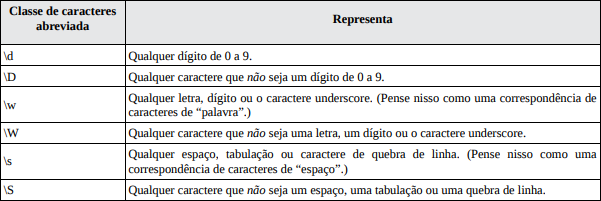

***Tabela 7.1 - Códigos abreviados para classes comuns de caracteres.***

As classes de caracteres são convenientes para reduzir as expressões regulares. A classe de caracteres **[0-5]** corresponderá somente aos números de 0 a 5; isso é muito mais conciso do que digitar **(0|1|2|3|4|5)**.

Por exemplo, digite o seguinte código:

In [ ]:
natal_regex = re.compile(r'\d+\s\w+')
natal_regex.findall('12 drummers, 11 pipers, 10 lords, 9 ladies, 8 maids, 7 swans, 6 geese,'
                    '5 rings, 4 birds, 3 hens, 2 doves, 1 partridge')
# ['12 drummers', '11 pipers', '10 lords', '9 ladies', '8 maids', '7 swans', '6 geese', 
#  '5 rings', '4 birds', '3 hens', '2 doves', '1 partridge']

A expressão regular **\d+\s\w+** corresponderá a textos que tenham um o mais dígitos (\d+) seguidos de um caracteres de espaço em branco (\s) seguido de um ou mais caracteres que sejam letra/dígito/underscore (\w+). O método **findall()** retorna todas as strings que correspondem ao padrão da regex em uma lista.

## Criando suas próprias classes de caracteres

Haverá ocasiões em que você vai querer fazer a correspondência de um conjunto de caracteres, porém as classes abreviadas de caracteres (\d, \w, \s e assim por diante) serão amplas demais. Você pode definir sua própria classe de caracteres usado colchetes. Por exemplo, a classe de caracteres **[aeiouAEIOU]** corresponderá a qualquer vogal, tanto minúscula como maiúscula. Digite o código a seguir:

In [ ]:
classe_regex = re.compile(r'[aeiouAEIOU]')
classe_regex.findall('O Python é muito bom. Serve para DIVERSAS COISAS!')
# ['O', 'o', 'u', 'i', 'o', 'o', 'e', 'e', 'a', 'a', 'I', 'E', 'A', 'O', 'I', 'A']

Também é possívelincluir intervalos de letras ou de números usando um hífen. Por exemplo, a classe de caracteres **[a-zA-z0-9]** corresponderá a todas as letras minúsculas, às letras maiúsculas e aos números.

Observe que, nos colchetes, os símbolos normais de ezpressão regular não são interpretados. Isso quer dizer que não é necessário escapar os caracteres **...**, __*__, **?** ou **()** com a barra invertida na frente. Por exemplo, a classe de caracteres **[0-5.]** corresponderá aos dígitos 0 a 5 e um ponto. Não é preciso escrever essa classe como **[0-5\\.]**.

Ao inserir um acento circunflexo (^) logo depois do colchete de abertura da classe de caracteres, podemos criar uma *classe negativa de caracteres*. Uma classe negativa de caracteres corresponderá a todos os caracteres que *não* estejam na classe de caracteres. Por exemplo, digite o seguinte código:

In [ ]:
constante_regex = re.compile(r'[^aeiouAEIOU]')
constante_regex.findall('O Python é muito bom. Serve para DIVERSAS COISAS!')
# [' ', 'P', 'y', 't', 'h', 'n', ' ', 'é', ' ', 'm', 't', ' ', 'b', 'm', '.', ' ', 'S', 'r', 'v', ' ', 
#  'p', 'r', ' ', 'D', 'V', 'R', 'S', 'S', ' ', 'C', 'S', 'S', '!']

Agora, em vez de fazer a correspondência de todas as vogais, estamos fazendo a correspondência de todos os caracteres que não sejam uma vogal.

## Acento circunflexo e o sinal de dólar

O símbolo de acento circunflexo (^) também pode ser usado no início de uma regex para indicar que uma correspondência deve ocorrer no *início* de um texto pesquisado. Da mesma maneira, podemos colocar um sinal de dólar (\$) no final da regex para indicar que a string deve *terminar* com esse padrão de regex. Além disso, podemos usar ^ e $ juntos para indicar que a string toda deve corresponder à regex -ou seja, não é suficiente qe uma correspondência seja feita com algum subconjunto da string.

Por exemplo, a string **r'^Olá'** da expressão regular corresponde a strings que comecem com 'Olá'. Digite o código a seguir:

In [ ]:
comecar_com_ola = re.compile(r'^Olá')
comecar_com_ola.search('Olá Mundo!')
# <re.Match object; span=(0, 3), match='Olá'>
comecar_com_ola.search('Ele disse olá.') == None
# True

A string **r'\d$'** de expressão regular corresponde a strings que terminem com um caractere numérico de 0 a 9. Digite o seguinte código:

In [ ]:
terminar_com_numero = re.compile(r'\d$')
terminar_com_numero.search('Seu número é 98')
# <re.Match object; span=(14, 15), match='8'>
terminar_com_numero.search('Seu número é noventa e oito') == None
# True

A string **r'^\d+$'** de expressão regular corresponde a strings que comecem e terminem com um ou mais caracteres numéricos. Digite o código abaixo:

In [ ]:
tudo_numero = re.compile(r'^\d+$')
tudo_numero.search('1234567890')
# <re.Match object; span=(0, 10), match='1234567890'>
tudo_numero.search('1235xyz67890') == None
# True
tudo_numero.search('12 34567890') == None
# True

As duas últimas chamadas ao método **search()** no exemplo anterior mostram como a string toda deve corresponder à regex se ^ e $ forem utilizados.

Para que seja fácil de lembrar a posição desses caracteres em um objeto **Regex** criado, lembre-se que o **C** de **C**ircunflexo vem antes de **D** de **D**ólar.

## Caractere-curinga

O caractere **.** (ou *ponto*) em uma expressão regular é chamado de *caractere-curinga* e corresponde a qualquer caractere, exceto uma quebra de linha. Por exemplo, digite o seguinte código:

In [ ]:
at_regex = re.compile(r'.at')
at_regex.findall('The cat in the hat sat in the flat mat.')
# ['cat', 'hat', 'sat', 'lat', 'mat']

Lembre-se de que o caractere ponto corresponderá a um caractere, motivo pelo qual a correspondência para o texto **flat** no exemplo acima foi feita somente com **lat**. Para fazer a correspondência de um ponto propriamente tido, escape-o com uma barra invertida, ou seja, use **\\.**.

### Correspondendo a tudo usando ponto-asterisco

Às vezes, vamos querer fazer uma correspondência de tudo. Por exemplo, sponha que você queira fazer a correspondência da string 'Primeiro nome:' seguida de todo e qualquer texto seguido de 'Sobrenome:' e, por fim, seguida de qualquer caractere novamente. Podemos usar ponto-asterisco __(.*)__ para indicar 'qualquer caractere'. Lembre-se de que o caractere ponto quer dizer 'qualquer caractere único, exceto a quebra de linha' e o caractere asterisco quer dizer 'zero ou mais ocorrências do caractere anterior'.

Digite o código a seguir:

In [ ]:
nome_regex = re.compile(r'Primeiro nome: (.*) Sobrenome: (.*)')
mo = nome_regex.search('Primeiro nome: Guilherme Sobrenome: Trevisan')
mo.group(1)
# Guilherme
mo.group(2)
# Trevisan

O ponto-asterisco utiliza o modo *greedy*: ele sempre tentará fazer a correspondência do máximo de texto possível. Para correspoder a todo e qualquer texto em modo *nongreedy*, utilize ponto, asteristo e ponto de interrogação __(.*?)__. Assim como no vaso das chaves, o ponto de interrogação diz ao Python para fazer a correspondência em modo nongreedy.

Digite o seguinte código para ver a diferença entre as versões greedy e nongreedy:

In [ ]:
nongreedy_regex = re.compile(r'<.*?>')
mo = nongreedy_regex.search('<Reserva para um>para jantar.>')
mo.group()
# '<Reserva para um>'

greedy_regex = re.compile(r'<.*>')
mo = greedy_regex.search('<Reserva para um>para jantar.>')
mo.group()
# '<Reserva para um>para jantar.>'

### Correspondendo a quebras de linha com o caractere ponto

O ponto-asterisco corresponderá a qualquer caractere, exceto uma quebra de linha. Ao passar **re.DOTALL** como segundo parâmetro de **re.compile()**, podemos fazer o caractere ponto corresponder a *todos* os caracteres, incluindo o caractere de quebra de linha.

Digite o código abaixo:

In [ ]:
sem_nova_linha_regex = re.compile('.*')
sem_nova_linha_regex.search('Terminei a corrida.\nCombati o bom combate.\nMantive a fé.').group()
# 'Terminei a corrida.'

com_nova_linha_regex = re.compile('.*', re.DOTALL)
com_nova_linha_regex.search('Terminei a corrida.\nCombati o bom combate.\nMantive a fé.').group()
# 'Terminei a corrida.\nCombati o bom combate.\nMantive a fé.'

A regex **sem_nova_linha_regex**, criada sem que **re.DOTALL** tenha sido passado para a chamada de **re.compile()**, corresponderá a qualquer caractere até o primeiro caractere de quebra de linha, enquanto **com_nova_linha_regex**, que *teve* **re.DOTALL** passado para **re.compile()**, corresponderá a todos os caracteres. É por isso que a chamada a **com_nova_linha_regex.search()** corresponde à string completa, incluindo seus caracteres de quebra de linha.

## Revisão dos símbolos de regex

Este capítulo discutiu bastante a notação; sendo assim, apresentaremos uma revisão rápida do que aprendemos:

- **?** corresponde a zero o uma ocorrência do grupo anterior.


- <b>*</b> corresponde a zero ou mais ocorrências do grupo anterior.


- **+** corresponde a uma ou mais ocorrências do grupo anterior.


- **{n}** corresponde a exatamente *n* ocorrências do grupo anterior.


- **{n,}** corresponde a exatamente *n* ou mais ocorrências do grupo anterior.


- **{,m}** corresponde a zero até *m* ocorrências do grupo anterior.


- **{n,n}** corresponde a no mínimo *n* e no máximo *m* ocorrências do grupo anterior.


- **{n,m}?** ou __*?__ ou **+?** faz uma correspondência nongreedy do grupo anterior.


- **^spam** quer dizer que a string deve começar com *spam*.


- **spam$** quer dizer que a string deve terminar com *spam*.


- **.** corrresponde a qualquer caractere, exceto os caracteres de quebra de linha.


- **\d**, **\w** e **\s** correspondem a um dígito, um caractere de palavra ou um caractere de espaço, respectivamente.


- **\D**, **\W** e **\S** correspondem a qualquer caractere, exceto um dígito, um caractere de palavra ou um caractere de espaço, respectivamente.


- **[abc]** corresponde a qualquer caractere que estiver entre os colchetes (por exemplo *a*, *b* ou *c*).


- **[^abc]** corresponde a qualquer caractere que não esteja entre os colchetes.

## Correspondências sem diferenciar letras maiúsculas de minúsculas

Normalmente, as expressões regulares fazem correspondência de textos com o tipo exato de letra, ou seja, maiúscula ou minúscula, que você especificar. Por exemplo, as regexes a seguir fazem a correspondência de strings totalmente diferentes:

In [ ]:
regex_1 = re.compile('Python')
regex_2 = re.compile('PYTHON')
regex_3 = re.compile('python')
regex_4 = re.compile('PyThoN')

Entretanto, às vezes, você estará preocupado somente em fazer a correspondência das letras, sem se importar se elas são maiúsculas ou minúsculas. Para fazer sua regex ignorar as diferenças entre letras maiúsculas e minúsculas (ser case-sensitive), **re.IGNORECASE** ou **re.I** pode ser passado como segundo argumento de **re.compile()**. Digite o código a seguir:

In [ ]:
python = re.compile(r'python', re.I)
python.search('O Python foi criado pelo Guido.').group()
# 'Python'
python.search('O logo é baseado na cobra python.').group()
# 'python'
python.search('Além disso, a linguagem PYTHON é holandesa.')
# 'PYTHON'

## Substituindo strings com o método sub()

As expressões regulares não só podem identificar padrões de texto como também podem substituir esses padrões por novos textos. O método **sub()** dos objetos **Regex** recebe dois argumentos. O primeiro argumento é uma string para substituir qualquer correspondência. O segundo é a string par a expressão regular. O método **sub** retorna uma string com as substituições aplicadas.

Por exemplo, digite o seguinte:

In [ ]:
nomes_regex = re.compile(r'Agente \w+')
nomes_regex.sub('CENSURADO', 'Agente Alice entregou os documentos secretos para o Agente Bob.')
# 'CENSURADO entregou os documentos secretos para o CENSURADO.'

Às vezes, pode ser necessário utilizar o próprio texto correspondente como parte da sbstituição. No primeiro argumento de **sub()**, podemos digitar **\1**, **\2**, **\3** e assim por diante para dizer 'insira o texto do grupo 1, 2, 3 e assim por diante na substituição'.

Por exemplo, suponha que você queira censurar os nomes dos agentes secretos mostrando apenas as primeiras letras dos seus nomes. Para isso, podemos usar a regex __Agente (\w)\w*__ e passar __r'\1****'__ como o primeiro argumento de **sub()**. **\1** nessa string será sbstituído por qualquer texto correspondente no grupo 1 -ou seja, o grupo **(\w)** da expressão regular. Escreva o código abaixo:

In [ ]:
agente_regex = re.compile(r'Agente (\w)\w*')
agente_regex.sub(r'\1****', 'Agente Alice falou para a Agente Carol que a Agente Eve sabe '
                 'que o Agente Bob é um agente tuplo.')
# 'A**** falou para a C**** que a E**** sabe que o B**** é um agente tuplo.'

## Administrando regexes complexas

As expressões regulares serão convenientes se o padrão de texto para a correspondência for simples. Porém fazer a correspondência de padrões complicados de texto pode exigir expressões regulares longas e confusas. Podemos atenuar esse problema dizendo à função **re.compile()** que ignore espaços em branco e comentários na string de expressão regular. Esse 'modo verbose' pode ser habilitado se a variável **re.VERBOSE** for passada como segundo argumento de **re.compile()**.

Agora, em vez de uma expressão regular difícil de ler como:

In [ ]:
telefone_regex = re.compile(r'((\d{3}|\(\d{3}\))?(\s|-|\.)?\d{3}(\s|-|\.)\d{4}(\s*(ext|x|ext.)\s*\d{2,5})?)')

Podemos distribuir a expressão regular em várias linhas usando comentários como:

In [ ]:
telefone_regex = re.compile(r'''(
(\d{3}|\(\d{3}\))?  # código de área
(\s|-|\.)?  # separador
\d{3}  # primeiros três dígitos
(\s|-|\.)  # separador
\d{4}  # últimos 4 dígitos
(\s*(ext|x|ext.)\s*\d{2,5})?  # extensão
)''', re.VERBOSE)

Observe como o exemplo anterior utiliza a sintaxe de aspas triplas (''') para criar uma string de múltiplas linhas de modo que a definição da expressão regular possa ser distribuída em diveras linhas, tornando-a mais legível.

As regras para comentários em uma string de expressão regular são as mesmas usadas no código Python normal: o símbolo **#** e tudo o que estiver depois dele até o final da linha serão ignorados. Além disso, os espaços extras na string de múltiplas linhas da expressão regular não serão considerados como parte do padrão de texto para a correspondência. Isso permite organizar a expressão regular para que ela se torne mais fácil de ler.

## Combinando re.IGNORECASE, re.DOTALL e re.VERBOSE

O que aconteceria se você quisesse usar **re.VERBOSE** para escrever comentários em sua expressão regular, mas também quisesse utilizar **re.IGNORECASE** para ignorar as diferenças entre letras maiúsculas e minúsculas?. Infelizmente, a função **re.compile()** aceita apenas um único valor como segundo argumento. Podemos contornar essa limitação combinando as variáveis **re.IGNORECASE**, **re.DOTALL** e **re.VERBOSE** utilizando o caractere pipe (|) que, nesse contexto, é conhecido como o operador *ou bit a bit* (bitwise or).

Portanto, se quiser uma expressão regular que ignore as diferenças entre letras maiúsculas e minúsculas *E* inclua quebras de linha para que correspondam a caractere ponto, sua chamada a **re.compile()** deverá ser feita da seguinte forma:

In [ ]:
algum_valor_regex = re.compile('foo', re.IGNORECASE | re.DOTALL)

As três opções para o segundo argumento terão o aspect a seguir:

In [ ]:
algum_valor_regex = re.compile('foo', re.IGNORECASE | re.DOTALL | re.VERBOSE)

Essa sintaxe é um pouco antiga e tem origem na primeiras versões do Python. Os detalhes sobre os operadores bit a bit estão além do escopo deste estudo. Também podemos passar outras opções para o segundo argumento; elas são incomuns, porém com uma pesquisa rápida na internet você pode encontrá-las e saber o que cada uma faz.

## Projeto: extrator de números de telefone e de endereços de email

Suponha que você tenha a tarefa maçante de localizar todos os números de telefone e endereços de email em uma página web ou documentos extenso. Se fizer rolagens manualmente pela página, você poderá acabar fazendo a pesquisa por bastante tempo. Porém, se você tivesse um programa que pudesse pesquisar o texto em seu clipboard em busca de números de telefone e endereços e de email, será possível simplesmente pressionar **CTRL+A** para selecionar todo o texto, **CTRL+C** para copiá-lo para o clipboard e então executar o seu programa. Ele poderia substituir o texto no clipboard somente pelos números de telefone e pelos endereços de email encontrados.

Sempre que estiver diante de um novo projeto, pode ser tentar mergulhar diretamente na escrita do código. No entanto, com muita frequência, será melhor dar um passo para trás e considerar o quadro geral. A melhor coisa a se fazer antes é definir inicialmente um plano geral para o que seu programa deverá fazer. Não pense ainda no código propriamente dito -você poderá se preocupar com ele depois. Neste momento, atenha-se aos aspectos mais gerais.

Por exemplo, seu extrator de números de telefone e de endereços de emails deverá fazer o seguinte:

- Obter o texto do clipboard.


- Encontrar todos os números de telefone e os endereços de email no texto.


- Colá-los no clipboard.


Agora você poderá começar a pensar em como isso funcionará no código. O código deverá fazer o seguinte:

- Usar o módulo ***pyperclip*** para copiar e colar strings.


- Criar duas regex: uma para corresponder a números de telefone e outra para endereços de email.


- Encontrar todas as correspondências, e não apenas a primeira, para ambas as regex.


- Formatar as strings correspondentes de forma elegante em uma única string a ser colada no clipboard.


- Exibir algum tipo de mensagem caso nenhuma correspondência tenha sido encontrada no texto.

Essa lista é como o mapa do projeto. À medida que escrever o código, você poderá focar em cada um desses passos separadamente. Cada passo é razoavelmente administrável e está expresso em termos de tarefas que você já sabe fazer em Python.

### Passo 1: Criar uma regex para números de telefone

Inicialmente, você deve criar uma expressão regular para procurar números de telefone. Crie um novo arquivo, digite o código a seguir e salve-o como **telefone_email.py**:

In [ ]:
#! python3
# telefone_email.py - Encontra números de telefone e endereços de email no clipboard.

import re
import pyperclip

# Cria a regex para o telefone
telefone_regex = re.compile(r'''(
(\d{3}|\(\d{3}\))?              #código de área
(\s|-|\.)?                      # separador
(\d{3})                         # primeiros 3 dígitos
(\s|-|\.)                       # separador
(\d{4})                         # últimos 4 dígitos
(\s*(ext|x|ext.)\s*(\d{2,5}))?  # extensão
)''', re.VERBOSE)

# ToDo: Criar a regex para email.

# ToDo: Encontrar correspondências no texto do clipboard.

# ToDo: Copiar dos resultados para o clipboard.

Os comentários *ToDo* são apenas um esqueleto para os programas. Eles serão substituídos à medida que você escrever o código propriamente dito.

O número de telefone começa com um código de área *opacional*, portanto o grupo para código de área é seguido de um ponto de interrogação. Como o código de área pode ter apenas três dígitos (isto é, **\d{3}**), ou *três* dígitos entre parênteses (isto é, **\\(\d{3}\\\)**, com uma contrabarra no final. O markdown não permite que seja usada uma sem que ele formate), deve haver um pipe unindo essas partes. Você pode adicionar o comentário **# código de área** na regex para essa parte da string de múltiplas linhas; isso ajudará a se lembrar a que **(\d{3}|\\(\d{3}\\\))?** deve corresponder.

O caractere do número de telefone pode ser um espaço (**\s**), um hífen (**-**) ou um ponto (**.**), portanto essas partes também devem ser unidas por pipes. As próximas partes da expressão regular são simples: três dígitos seguidos de outro separador seguido de quatro dígitos. A última parte é uma extensão opcional composta de qualquer quantidade de espaços seguida de *ext*, *x* our *ext.* seguida de dois a cinco dígitos.

### Passo 2: Criar uma regex para endereços de email

Também será necessário ter uma expressão regular que possa corresponder a endereços de email. Faça seu programa ter o seguite aspecto:

In [ ]:
#! python3
# telefone_email.py - Encontra números de telefone e endereços de email no clipboard.

import re
import pyperclip

# Cria a regex para o telefone
telefone_regex = re.compile(r'''(
--trecho removido--)''')

# Cria a regex para email
email_regex = re.compile(r'''(
[a-zA-Z0-9._%+-]+  # nome do usuário
@                  # símbolo arroba
[a-zA-Z0-9.-]+     # nome do domínio
(\.[a-zA-Z]{2,4})  # ponto seguido de outros caracteres
)''', re.VERBOSE)

# ToDo: Encontrar correspondências no texto do clipboard.

# ToDo: Copiar os resultados para o clipboard.

A parte referente ao nome do usuário no endereço de email tem um ou mais caracteres que podem ser: letras maiúsculas e minúsculas, número, um ponto, um underscore, um sinal de porcentagem, um sinal de adição ou um hífen. Tudo isso pode ser colocado em uma classe de caracteres: **[a-zA-Z0-9._%+-]**.

O domínio e o nome do usuário são separados por um símbolo arroba (**@**). O nome do domínio tem uma classe de caracteres um pouco menos permissiva, contendo apenas letras, números, pontos e hífens: **[a-zA-Z0-9.-]**. Por fim, temos a parte 'ponto com' (tecnicamente conhecida como *domínio de mais alto nível*) que, na verdade, pode ser um ponto seguido de qualquer caractere. Ess parte tem entre dois e quatro caracteres.

O formato dos endereços de email tem muitas regras singulares. Essa expressão regular não corresponderá a todos os endereços possíveis de email, porém corresponderá a quase todos os endereços típicos de email que você encontrar.

### Passo 3: Encontrar todas as correspondências no texto do clipboard

Agora que especificamos as expressões regulares para números de telefone e endereços de email, podemos deixar o módulo ***re*** do Python fazer o trabalho pesado e localizar todas as ocorrências no clipboard. A função **pyperclip.paste()** obterá um valor de string com o texto que está no clipboard e o método de regex **findall()** retornará uma lista de tuplas.

Faça seu programa ter o seguinte aspecto:

In [ ]:
#! python3
# telefone_email.py - Encontra números de telefone e endereços de email no clipboard.

import re
import pyperclip

# Cria a regex para o telefone
telefone_regex = re.compile(r'''(
--trecho removido--)''')

# Cria a regex para email
email_regex = re.compile(r'''(
--trecho removido--)''')

# Encontrar as correspondências no texto do clipboard
texto = str(pyperclip.paste())

matches = []
for grupos in telefone_regex.findall(texto):
    num_telefone = '-'.join([grupos[1], grupos[3], grupos[5]])
    if grupos[8] != '':
        num_telefone += 'x' + grupos[8]
    matches.append(num_telefone)
for grupos in email_regex.findall(texto):
    matches.append(grupos[0])
    
# ToDo: Copiar os resultados para o clipboard.

Há uma tupla para cada correspondência e cada tupla contém strings para cada grupo da expressão regular. Lembre-se de que o grupo 0 corresponde à expressão regular completa, portanto o grupo no índice 0 da tupla é aquela em que estaremos interessados.

Como podemos ver, as correspondências serão armazenadas em uma variável de lista chamada **matches**. O programa começa com uma lista vazia e dois loops **for**. Para os endereços de email, devemos concatenar o grupo 0 de cada correspondência. Para os números de telefone correspondentes, não queremos concatenar somente o grupo 0. Embora o programa *detecte* números de telefone em diversos formatos, queremos que esse número seja concatenado em um formato único e padrão. A variável **num_telefone** contém uma string criada a partir dos grupos 1, 3, 5 e 8 do texto correspondente. Esses grupos são: o código de área, os três primeiros dígitos, os quatro últimos dígitos e a extensão, respectivamente).

### Passo 4: Reunir as correspondências em uma string para o clipboard

Agora que temos os endereços de email e os números de telefone na forma de uma lista de strings em **matches**, devemos inseri-los no clipboard. A função **pyperclip.copy()** aceita apenas um único valor de string, e não uma lista de strings; sendo assim, você deve chamar o método **join()** em **matches**.

Para fazer com que seja mais fácil ver que o programa está funcionando, vamos exibir qualquer correspondência encontrada no terminal. Se nenhum número de telefone ou endereço de email for encontrado, o programa deverá informar isso ao usário.

Faça o seu programa ter o seguinte aspecto:

In [ ]:
#! python3
# telefone_email.py - Encontra números de telefone e endereços de email no clipboard.

import re
import pyperclip

# Cria a regex para o telefone
telefone_regex = re.compile(r'''(
--trecho removido--)''')

# Cria a regex para email
email_regex = re.compile(r'''(
--trecho removido--)''')

# Encontrar as correspondências no texto do clipboard
texto = str(pyperclip.paste())
'--trecho removido--'

# Copiar os resultados para o clipboard
if len(matches) > 0:
    pyperclip.copy('\n'.join(matches))
    print('Copiado no clipboard:')
    print('\n'.join(matches))
else:
    print('Nenhum telefone ou email foram encontrados.')

### Executando o programa

Para ver um exemplo, abra o seu navegador na página de contato da *No Starch Press* em **http://www.nostarch.com/contactus.htm**, tecle **CTRL+A** para selecionar todo o texto da página e **CTRL+C** para copiá-lo para o clipboard. Ao executar esse programa, a saída será semelhante a:

Copiado no clipboard:

800-420-7240

415-863-9900

415-863-9950

info@nostarch.com

media@nostarch.com

academic@nostarch.com

help@nostarch.com

### Ideias para programas semelhantes

Identificar padrões de texto (e possivelmente substituí-los com o método **sub()**) tem várias aplicações diferentes em potencial:

- Encontrar URLs de sites que começem com *http://* ou *https://*.


- Limpar datas em formatos diferentes (como 14/3/2022, 14-03-2022 e 2022/3/14) substituindo-as por datas em um único padrão.


- Remover informações críticas como números de CPF (Certficado de Pessoal Física) ou números de cartões de crédito.


- Encontrar    erros    comuns    de    digitação    como    vários    espaços entre palavras, repetição acidental acidental de palavras ou vários pontos de exclamação no final das sentenças. São irritantes!!

## Resumo

Embora um computador possa procurar um texto rapidamente, devemos dizer-lhe exatamente o que deverá ser procurado. As expressões regulares permitem especificar padrões exatos de caracteres que estivermos procurando. Com efeito, alguns processadores de texto e aplicativos de planilhas oferecem funcionalidades para pesquisar e substituir que permitem fazer pesquisas usando expressões regulares.

O módulo ***re*** que acompanha o Python permite compilar objetos **Regex**. Esses valores têm diversos métodos: **search()** para encontrar um única correspondência, **findall()** para encontrar todas as instâncias correspondentes e **sub()** para pesquisar e substituir texto.

Há mais sobre a sintaze de expressões regulares do que descrito neste capítulo. Você poderá descobrir mais informações na documentação oficial do Python em **https://docs.python.org/pt-br/3/library/re.html**. O site de tutoriais em **http://www.regular-expressions.info/** também é um recurso útil.

Agora que você tem expertise para para manipular e fazer correspondência de strings, é a hora de mergulhar de cabeça na leitura e na escrita de arquivos no disco rígido de seu computador.

## Exercícios práticos

### 1. Qual é a função de criar objetos *Regex*?

A função **re.compile()** retorna objetos **Regex**.

### 2. Por que as strings puras (raw strings) geralmente são usadas na criação de objetos *Regex*?

Strings puras são usadas para que as barras invertidas não precisem ser escapadas.

### 3. O que o método *search()* retorna?

O método **search()** retorna objetos **Match**.

### 4. Como podemos obter as strings correspondentes ao padrão a partir de um objeto *Match*?

O método **group()** retorna strings com o texto correspondente.

### 5. Na regex criada a partir de  *r'(\d\d\d)-(\d\d\d-\d\d\d\d)'*, o que o grupo 0 inclui? E o grupo 1? E o grupo 2?

O grupo 0 é a correspondência completa, o grupo 1 inclui o primeiro conjunto de parenteses e o grupo 2 inclui o segundo grupo de parênteses.

### 6. Os parênteses e os pontos têm significados específicos na sintaze das expressões regulares. Como podemos especificar uma regex que corresponda aos caracteres que representam parênteses e pontos?

Os pontos e os parênteses podem ser escapados com uma barra invertida.

### 7. O método *findall()* retorna uma lista de strings ou uma lista de tuplas de strings. O que faz com que uma ou outra opção seja retornada?

Se a regex não tiver nenhum grupo, uma lista de strings será retornada. Se a regex tiver grupos, uma lista de tuplas de strings será retornada.

### 8. O que o caractere | (pipe) representa em expressões regulares?

O caractere | (pipe) quer dizer uma correspondência de 'um ou outro' entre dois grupos.

### 9. Quais são os dois significados do caractere **?** em expressões regulares?

O caractere **?** pode significar 'corresponda a zero ou a um ocorrência do grupo anterior' ou pode ser sado para indicar uma correspondência nongreedy.

### 10. Qual a diferença entre os caracteres + e _*_ em expressões regulares?

**+** corresponde a um ou mais; __*__ corresponde a zero ou mais.

### 11. Qual a diferença entre {3} e {3,5} em expressões regulares?

**{3}** corresponde a exatamente três ocorrências do grupo anterior; **{3,5}** corresponde de três a cinco instâncias.

### 12. O que as classes abreviadas de caracteres *\d*, *\w* e *\s* representam em expressões regulares?

As classes abreviadas de caracteres **\d**, **\w** e **\s** correspondem a um dígito, um caractere de palavra o um caractere de espaço, respectivamente.

### 13. O que as classes abreviadas de caracteres *\D*, *\W* e *\S* representam em expressões regulares?

As classes abreviadas de caracteres **\D**, **\W** e **\S** correspondem a um único caractere que não seja um dígito, não seja um caractere de palavra ou não seja um carctere de espaço, respectivamente.

### 14. Como podemos fazer uma expressão regular ignorar as diferenças entre letras maiúsculas e minúsculas (ser case-insensitive)?

Passa **re.I** ou **re.IGNORECASE** como segundo argumento de **re.compile()** fará a correpondência ignorar a diferença entre letras maiúsculas e minúsculas.

### 15. A que o caractere **.** normalmente corresponde? A que ele corresponderá se **re.DOTALL** for passado como segundo argumento de **re.compile()**?

O caractere **.** normalmente corresponde a qualquer caractere, exceto o caractere de quabra de linha. Se **re.DOTALL** for passado como segundo argumento de **re.compile()**, o ponto também corresponderá aos caracteres de quebra de linha.

### 16. Qual é a diferença entre .* e .*? ?

__.*__ realiza ma correspondência greedy e __.*?__ representa uma correspondência nongreedy.

### 17. Qual é a sintaxe da classe de caracteres que corresponde a todos os números e a todas as letras minúsculas?

[0-9a-z] ou [a-z0-9].

### 18. Se *num_regex = re.compile(r'\d+')*, o que *num_regex.sub('X', '12 drummers, 11 pipers, five rings, 3 hens')* retornará?

X drummers, Xpipers, five rings, X hens.

### 19. O que a especificação de *re.VERBOSE* como segundo argumento de *re.compile()* permite fazer?

O argumento **re.VERBOSE** permite adicionar espaços em branco e cometários à strig passada para **re.compile()**.

### 20. Como você poderá escrever uma regex que corresponda a um número com vírgulas a cada três dígitos? Ela deverá corresponder a: 

- '42'

- '1,234'

- '6,368,745'

### mas não a:

- '12,34,567' (que tem somente dois dígitos entre as vírgulas)

- '1234' (que não tem vírgulas).

**re.compile(r'^\d{1,3}(,\d{3})*$')** criará essa regex, porém outras strings de regex podem gerar uma expressão regular semelhante.

### 21. Como você poderá escrever uma regex que corresponda ao nome completo de alguém coujo sobrenome seja Nakamoto? Suponha que o primeiro nome que vem antes dele sempre seja uma única palavra que comece com uma letra maiúscula. A regex deverá corresponder a:

- 'Satoshi Nakamoto'

- 'Alice Nakamoto'

- 'RoboCop Nakamoto'

### mas não a:

- 'satoshi Nakamoto' (em que o primeiro nome não começa com letra maiúscula)

- 'Mr. Nakamoto' (em que a palavra anterior tem um caractere que não é uma letra)

- 'Nakamoto' (que não tem o primero nome)

- 'Satoshi nakamoto' (em que Nakamoto não começa com letra maiúscula)

**re.compile(r'[A-Z][a-z]*\sNakamoto')**

### 22. Como você poderá escrever uma regex que corresponda a uma frase em que a primeira palavra seja *Alice*, *Bob* ou *Carol*, a segunda palavra seja *come*, *gosta* ou *joga*, a terceira seja *maçãs*, *gatos* ou *baseball* e a frase termine com um ponto? Essa regex não deve diferenciar letras maiúsculas de minúsculas. Ela deverá corresponder a:

- 'Alice come maçãs.'

- 'Bob gosta gatos.'

- 'Carol joga baseball.'

- Alixe joga Maçãs.'

- 'BOB COME GATOS.'

### mas não a:

- 'RoboCop come maçãs.'

- 'ALICE JOGA FUTEBOL.'

- 'Carol come 7 gatos.'

**re.compile(r'(Alice|Bob|Carol)\s(come|gosta|joga)\s(maçãs|gatos|baseball)\\.', re.IGNORECASE)**

## Projetos práticos

Para exercitar, escreva programas que executem as tarefas a seguir:

### Detecção de senhas robustas

Crie uma função que utilize expressões regulares para garantir que a string de senha recebida seja robusta. Uma senha robusta deve ter pelo menos oito caracteres, deve conter tanto letras maiúsculas quanto letras minúsculas e ter pelo menos um dígito. Talvez seja necessário testar a string em relação a diversos padrões de regex para validar sua robustez.

### Versão de *strip()* usando regex

Crie uma função que receba uma string e faça o mesmo que o método de string **strip()**. Se nenhum outro argumento for passado além da string em que a remoção será feita, os caracteres de espaço em branco serão removidos do início e do fim da string. Caso contrário, os caracteres especificados no segundo argumento da função serão removidos da string.